In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import nltk

In [3]:
df=pd.read_csv("train_comments.csv")
df.head()

C:\Users\You-Myeong\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (6,7,9,14,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,pid,tokens,comment_length,n_tokens,keywords
0,SirT6,The title sort of misses the point of the stud...,"&lt;div class=""md""&gt;&lt;p&gt;The title sort ...",0,1447279564,1447250764,NaN,0,False,1,cwwhtv7,NaN,t3_3se6lu,t1_cwwhtv7,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",1359,science,1359,3se6lu,"Counter({'alga': 5, 'cancer': 4, 'cell': 4, 'd...",869,52,"{'toxinalgae': 1.009933774834437, 'cancer': 1...."
1,DrBiochemistry,Just want to point out that until I see a deli...,"&lt;div class=""md""&gt;&lt;p&gt;Just want to po...",0,1447277409,1447248609,NaN,0,False,0,cwwgxle,NaN,t3_3se6lu,t1_cwwgxle,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",3209,science,3209,3se6lu,"Counter({'kill': 2, 'deliveri': 2, 'cancer': 1...",307,30,"{'delivery': 1.0588235294117647, 'survives': 1..."
2,Frogblood,It's an interesting idea but the in vitro and ...,"&lt;div class=""md""&gt;&lt;p&gt;It&amp;#39;s an...",0,1447276156,1447247356,NaN,0,False,0,cwwggxu,NaN,t3_3se6lu,t1_cwwggxu,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",133,science,133,3se6lu,"Counter({'idea': 2, 'target': 2, 'overexcit': ...",432,39,"{'tumour': 1.0217391304347827, 'targeting': 1...."
3,mijn_ikke,Just waiting until somebody smarter than me co...,"&lt;div class=""md""&gt;&lt;p&gt;Just waiting un...",0,1447275611,1447246811,NaN,0,1447248944.0,1,cwwga6g,NaN,t3_3se6lu,t1_cwwga6g,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",773,science,773,3se6lu,"Counter({'thank': 1, 'gold': 1, 'point': 1, 'e...",163,12,"{'somebody': 1.0517241379310345, 'gold': 1.051..."
4,awhitt8,Yes the title is sensationalized.\n\n&gt;The m...,"&lt;div class=""md""&gt;&lt;p&gt;Yes the title i...",0,1447284967,1447256167,NaN,0,1447259263.0,0,cwwkopn,NaN,t3_3se6lu,t1_cwwkopn,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",16,science,16,3se6lu,"Counter({'drug': 5, 'deliveri': 4, 'materi': 3...",1447,104,"{'delivery': 1.030612244897959, 'title': 1.015..."


In [50]:
missing_index = df['created_utc'].index[df['created_utc'].apply(np.isnan)]

In [51]:
missing_index

Int64Index([2295, 2296, 12105, 12106, 27077, 27078, 27079, 27910, 27911, 28721, 28722, 32539, 32540, 33215, 33216, 44529, 44530, 69624, 69625, 88868, 88869, 88870, 109778, 109779, 110506, 110507, 110508, 173931, 173932, 175562, 175563, 175710, 175711, 179208, 179209, 179732, 179733, 179734, 182324, 182325, 203402, 203403, 205261, 205262, 206207, 206208, 214122, 214123, 219465, 219466, 245058, 245059, 263159, 263160, 276731, 276732], dtype='int64')

In [52]:
#Drop all the values that have nan inside 
list1 = []
for index in missing_index:
    list1.append(index)

In [53]:
df = df.drop(df.index[list1])

# add some more features

In [169]:
import datetime
def convert_time(time):
    hour = datetime.datetime.fromtimestamp(time).strftime('%H')
    return int(hour)

In [171]:
df['time'] = df.created_utc.apply(convert_time)

In [63]:
from nltk.tokenize import RegexpTokenizer
stopWords = nltk.corpus.stopwords.words('english') + ['.',',']
def tokenize(body):
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(unicode(str(body),"utf-8"))
    return [e.lower() for e in words if not e.lower() in stopWords]

In [64]:
df['token_body'] = df.body.apply(tokenize)

In [65]:
def tokensentence(token_body):
    return ' '.join(word for word in token_body)

In [66]:
df['token_sentence'] = df.token_body.apply(tokensentence)

In [94]:
def over500(upvote):
    if int(upvote) >= 500:
        return 'good'
    else:
        return 'bad'
df['over500'] = df.ups.apply(over500)

In [172]:
df.head()

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,pid,tokens,comment_length,n_tokens,keywords,token_body,token_sentence,over500,time
0,SirT6,The title sort of misses the point of the stud...,"&lt;div class=""md""&gt;&lt;p&gt;The title sort ...",0,1447279564,1447250764,NaN,0,False,1,cwwhtv7,NaN,t3_3se6lu,t1_cwwhtv7,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",1359,science,1359,3se6lu,"Counter({'alga': 5, 'cancer': 4, 'cell': 4, 'd...",869,52,"{u'toxinalgae': 1.00993377483, u'cancer': 1.03...","[title, sort, misses, point, study, title, imp...",title sort misses point study title implies al...,good,9
1,DrBiochemistry,Just want to point out that until I see a deli...,"&lt;div class=""md""&gt;&lt;p&gt;Just want to po...",0,1447277409,1447248609,NaN,0,False,0,cwwgxle,NaN,t3_3se6lu,t1_cwwgxle,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",3209,science,3209,3se6lu,"Counter({'kill': 2, 'deliveri': 2, 'cancer': 1...",307,30,"{u'survives': 1.02941176471, u'thing': 1.02941...","[want, point, see, delivery, system, 1, surviv...",want point see delivery system 1 survives gast...,good,8
2,Frogblood,It's an interesting idea but the in vitro and ...,"&lt;div class=""md""&gt;&lt;p&gt;It&amp;#39;s an...",0,1447276156,1447247356,NaN,0,False,0,cwwggxu,NaN,t3_3se6lu,t1_cwwggxu,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",133,science,133,3se6lu,"Counter({'idea': 2, 'target': 2, 'overexcit': ...",432,39,"{u'tumour': 1.02173913043, u'targeting': 1.043...","[interesting, idea, vitro, vivo, data, prelimi...",interesting idea vitro vivo data preliminary d...,bad,8
3,mijn_ikke,Just waiting until somebody smarter than me co...,"&lt;div class=""md""&gt;&lt;p&gt;Just waiting un...",0,1447275611,1447246811,NaN,0,1447248944.0,1,cwwga6g,NaN,t3_3se6lu,t1_cwwga6g,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",773,science,773,3se6lu,"Counter({'thank': 1, 'gold': 1, 'point': 1, 'e...",163,12,"{u'somebody': 1.05172413793, u'gold': 1.051724...","[waiting, somebody, smarter, comes, along, poi...",waiting somebody smarter comes along point blo...,good,8
4,awhitt8,Yes the title is sensationalized.\n\n&gt;The m...,"&lt;div class=""md""&gt;&lt;p&gt;Yes the title i...",0,1447284967,1447256167,NaN,0,1447259263.0,0,cwwkopn,NaN,t3_3se6lu,t1_cwwkopn,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",16,science,16,3se6lu,"Counter({'drug': 5, 'deliveri': 4, 'materi': 3...",1447,104,"{u'silicon': 1.01530612245, u'tissue': 1.01530...","[yes, title, sensationalized, gt, intensively,...",yes title sensationalized gt intensively inves...,bad,10


In [10]:
daf=pd.read_csv("train_articles.csv")
daf.head()


,authors,keywords,publish_date,summary,text,url,author,created_utc,domain,downs,gilded,is_self,likes,media,id,num_comments,num_reports,over_18,permalink,score,selftext,subreddit,thumbnail,title,ups,tokens,article_len,n_tokens
0,"[Derek Keats Flickr, Hannah Osborne, Marc Cirera]","{u'toxic': 1.01308139535, u'cancer': 1.0261627...",2015-11-10 16:00:00+00:00,Algae has been genetically engineered to kill ...,Algae has been genetically engineered to kill ...,http://www.ibtimes.co.uk/algae-genetically-eng...,the_phet,1447239366,ibtimes.co.uk,0,0,False,NaN,NaN,3se6lu,1073,NaN,False,/r/science/comments/3se6lu/algae_has_been_gene...,6705,NaN,science,http://b.thumbs.redditmedia.com/y1CGKgl69hKw-s...,Algae has been genetically engineered to kill ...,6705,"Counter({'alga': 11, 'drug': 9, 'cell': 8, 'ca...",2352,2352
1,"[Derek Keats Flickr, Hannah Osborne, Marc Cirera]","{u'toxic': 1.01308139535, u'cancer': 1.0261627...",2015-11-10 16:00:00+00:00,Algae has been genetically engineered to kill ...,Algae has been genetically engineered to kill ...,http://www.ibtimes.co.uk/algae-genetically-eng...,the_phet,1447239366,ibtimes.co.uk,0,0,False,NaN,NaN,3se6lu,1073,NaN,False,/r/science/comments/3se6lu/algae_has_been_gene...,6706,NaN,science,http://b.thumbs.redditmedia.com/y1CGKgl69hKw-s...,Algae has been genetically engineered to kill ...,6706,"Counter({'alga': 11, 'drug': 9, 'cell': 8, 'ca...",2352,2352
2,"[Derek Keats Flickr, Hannah Osborne, Marc Cirera]","{u'toxic': 1.01308139535, u'cancer': 1.0261627...",2015-11-10 16:00:00+00:00,Algae has been genetically engineered to kill ...,Algae has been genetically engineered to kill ...,http://www.ibtimes.co.uk/algae-genetically-eng...,the_phet,1447239366,ibtimes.co.uk,0,0,False,NaN,NaN,3se6lu,1073,NaN,False,/r/science/comments/3se6lu/algae_has_been_gene...,6708,NaN,science,http://b.thumbs.redditmedia.com/y1CGKgl69hKw-s...,Algae has been genetically engineered to kill ...,6708,"Counter({'alga': 11, 'drug': 9, 'cell': 8, 'ca...",2352,2352
3,[],"{u'diamond': 1.04316546763, u'laser': 1.008633...",None,"If Q-carbon is harder than diamond, why would ...","This is a collection of 0.02, 0.03 and 0.04 ca...",http://phys.org/news/2015-11-phase-carbon-diam...,skoalbrother,1448903226,phys.org,0,0,False,NaN,NaN,3uvg0o,2216,NaN,False,/r/science/comments/3uvg0o/researchers_find_ne...,6777,NaN,science,http://b.thumbs.redditmedia.com/hZrhEdBoJp22oE...,"Researchers find new phase of carbon, make dia...",6777,"Counter({'diamond': 21, 'qcarbon': 15, 'carbon...",4626,4626
4,[],"{u'diamond': 1.04316546763, u'laser': 1.008633...",None,"If Q-carbon is harder than diamond, why would ...","This is a collection of 0.02, 0.03 and 0.04 ca...",http://phys.org/news/2015-11-phase-carbon-diam...,skoalbrother,1448903226,phys.org,0,0,False,NaN,NaN,3uvg0o,2216,NaN,False,/r/science/comments/3uvg0o/researchers_find_ne...,6772,NaN,science,http://b.thumbs.redditmedia.com/hZrhEdBoJp22oE...,"Researchers find new phase of carbon, make dia...",6772,"Counter({'diamond': 21, 'qcarbon': 15, 'carbon...",4626,4626


# Normalize reddit upvote scores

In [6]:
topscores = {'Liberal': 106, 'videos': 10341, 'gentlemanboners': 1619, 'books':
        4914, 'Music': 7286, 'politics': 15133, 'nba': 4108, 'pokemon': 3270,
        'funny': 9633, 'technology': 10848, 'Conservative': 438, 'food': 3358,
        'WTF': 11107, 'worldnews': 10559, 'soccer': 2985, 'gaming': 16413,
        'aww': 7656, 'circlejerk': 3069, 'LadyBoners': 1190, 'news': 10995,
        'television': 9274, 'science': 8965, 'nfl': 5416, 'pics': 19196,
        'movies': 93504}

"""
normalize_scores
    Normalizes the score based on the max upvotes in the given subreddit.

    @param: ups (array of upvote scores), subreddit (name of subreddit)
    @ret: array of normalized scores
"""
def normalize_scores(ups, subreddit):
    return [float(x)/topscores[subreddit] for x in ups]

def denormalize_scores(norms, subreddit):
    return [x * topscores[subreddit] for x in norms]

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
def make_xy(df, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
    X = vectorizer.fit_transform(df.token_sentence)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (df.over500 == 'good').values.astype(np.int)
    return X, y
X, y = make_xy(df)

# Naive Bayes 

In [114]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain, ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

MN Accuracy: 97.91%


In [115]:
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.98
Accuracy on test data:     0.98


In [116]:
from sklearn.cross_validation import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [117]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    bad = y == 0
    good = ~bad
    return prob[bad, 0].sum() + prob[good, 1].sum()

In [118]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [119]:
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = TfidfVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(df, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        #your code here
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df

In [120]:
print "alpha: %f" % best_alpha
print "min_df: %f" % best_min_df

alpha: 5.000000
min_df: 0.010000


In [121]:
vectorizer = TfidfVectorizer(min_df=best_min_df)
X, y = make_xy(df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

# Your code here. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.98
Accuracy on test data:     0.98


In [122]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(ytest, clf.predict(xtest))

[[86347     0]
 [ 1756     0]]


In [123]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print "Good words\t     P(fresh | word)"
for w, p in zip(good_words, good_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))
    
print "Bad words\t     P(fresh | word)"
for w, p in zip(bad_words, bad_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))

Good words	     P(fresh | word)
                edit 0.10
                  gt 0.06
                said 0.04
                says 0.04
               study 0.03
                case 0.03
                 two 0.03
                part 0.03
               found 0.03
              police 0.03
Bad words	     P(fresh | word)
            anything 0.02
                good 0.02
              better 0.02
                  go 0.02
             america 0.02
                mean 0.02
              always 0.01
               makes 0.01
              wonder 0.01
               looks 0.01


In [124]:
def calibration_plot(clf, xtest, ytest):
    prob = clf.predict_proba(xtest)[:, 1]
    outcome = ytest
    data = pd.DataFrame(dict(prob=prob, outcome=outcome))

    #group outcomes into bins of similar probability
    bins = np.linspace(0, 1, 20)
    cuts = pd.cut(prob, bins)
    binwidth = bins[1] - bins[0]
    
    #freshness ratio and number of examples in each bin
    cal = data.groupby(cuts).outcome.agg(['mean', 'count'])
    cal['pmid'] = (bins[:-1] + bins[1:]) / 2
    cal['sig'] = np.sqrt(cal.pmid * (1 - cal.pmid) / cal['count'])
        
    #the calibration plot
    ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    p = plt.errorbar(cal.pmid, cal['mean'], cal['sig'])
    plt.plot(cal.pmid, cal.pmid, linestyle='--', lw=1, color='k')
    plt.ylabel("Empirical P(Fresh)")
    
    #the distribution of P(fresh)
    ax = plt.subplot2grid((3, 1), (2, 0), sharex=ax)
    
    plt.bar(left=cal.pmid - binwidth / 2, height=cal['count'],
            width=.95 * (bins[1] - bins[0]),
            fc=p[0].get_color())
    
    plt.xlabel("Predicted P(Fresh)")
    plt.ylabel("Number")

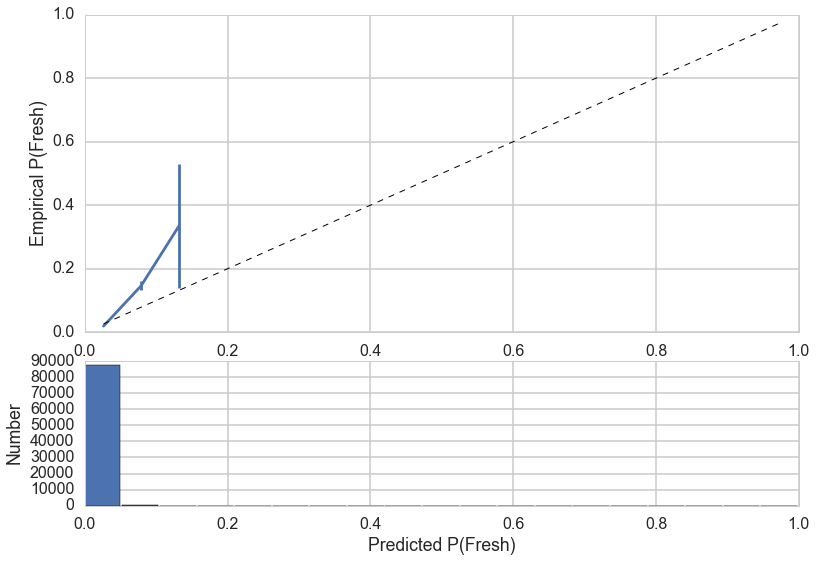

In [125]:
calibration_plot(clf, xtest, ytest)

# Conclusion is that bag of word represnetaiton does terribly when looking at entire subreddits

In [126]:
df.subreddit.unique()

array(['science', 'news', 'worldnews', 'dataisbeautiful', 'todayilearned',
       'politics', 'technology', 'space', 'InternetIsBeautiful',
       'nottheonion', 'gadgets', 'Documentaries', 'UpliftingNews',
       'programming', 'europe', 'datascience', 'uspolitics', 'ukpolitics',
       'CanadaPolitics', 'Liberal', 'Conservative', 'nba', 'soccer', 'nfl',
       'food', 'SubredditSimulator'], dtype=object)

In [176]:
politics = df[df.subreddit == 'politics']

In [177]:
politics.head()

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,pid,tokens,comment_length,n_tokens,keywords,token_body,token_sentence,over500,time
56919,whocaresguy,start calling conservative radio complaining a...,"&lt;div class=""md""&gt;&lt;p&gt;start calling c...",0,1447028766,1446999966,NaN,0,1447044336.0,1,cwsy3gl,NaN,t3_3s0878,t1_cwsy3gl,NaN,t3_3s0878,"{u'kind': u'Listing', u'data': {u'modhash': No...",980,politics,980,3s0878,"Counter({'use': 3, 'obama': 2, 'like': 2, 'ins...",440,38,"{u'term': 1.02027027027, u'used': 1.0202702702...","[start, calling, conservative, radio, complain...",start calling conservative radio complaining o...,good,11
56920,TogaLord,They know. That's why they'll do it.,"&lt;div class=""md""&gt;&lt;p&gt;They know. That...",0,1447021979,1446993179,NaN,0,False,0,cwsuzm8,NaN,t3_3s0878,t1_cwsuzm8,NaN,t3_3s0878,"{u'kind': u'Listing', u'data': {u'modhash': No...",2139,politics,2139,3s0878,"Counter({'theyll': 1, 'know': 1, 'that': 1})",36,3,"{u'theyll': 1.21428571429, u'know': 1.21428571...","[know, ll]",know ll,good,9
56921,dzrtguy,Then we'll build a new internet with cocaine a...,"&lt;div class=""md""&gt;&lt;p&gt;Then we&amp;#39...",0,1447030760,1447001960,NaN,0,False,0,cwsz8ng,NaN,t3_3s0878,t1_cwsz8ng,NaN,t3_3s0878,"{u'kind': u'Listing', u'data': {u'modhash': No...",49,politics,49,3s0878,"Counter({'encrypt': 1, 'well': 1, 'cocain': 1,...",73,7,"{u'hookers': 1.125, u'encryption': 1.125, u'co...","[ll, build, new, internet, cocaine, hookers, e...",ll build new internet cocaine hookers encryption,bad,11
56922,No_Fence,Some fun quotes regarding the TPP: \n\n“The ma...,"&lt;div class=""md""&gt;&lt;p&gt;Some fun quotes...",0,1447024523,1446995723,NaN,0,False,0,cwsw0ul,NaN,t3_3s0878,t1_cwsw0ul,NaN,t3_3s0878,"{u'kind': u'Listing', u'data': {u'modhash': No...",888,politics,888,3s0878,"Counter({'tpp': 7, 'trade': 3, 'corpor': 3, '\...",1374,105,"{u'rights': 1.01408450704, u'wall': 1.01408450...","[fun, quotes, regarding, tpp, majority, congre...",fun quotes regarding tpp majority congress kep...,good,10
56923,lanadapter,Apparently this bill is so bad it actually cam...,"&lt;div class=""md""&gt;&lt;p&gt;Apparently this...",0,1447029320,1447000520,NaN,0,False,0,cwsyehh,NaN,t3_3s0878,t1_cwsyehh,NaN,t3_3s0878,"{u'kind': u'Listing', u'data': {u'modhash': No...",142,politics,142,3s0878,"Counter({'life': 1, 'actual': 1, 'bill': 1, 's...",96,8,"{u'life': 1.08823529412, u'started': 1.0882352...","[apparently, bill, bad, actually, came, life, ...",apparently bill bad actually came life started...,bad,11


'99'

In [129]:
X, y = make_xy(politics)

In [130]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain, ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

MN Accuracy: 98.50%


In [131]:
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.99
Accuracy on test data:     0.99


In [132]:
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [133]:
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = TfidfVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(df, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        #your code here
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df

In [134]:
print "alpha: %f" % best_alpha
print "min_df: %f" % best_min_df

alpha: 5.000000
min_df: 0.010000


In [135]:
vectorizer = TfidfVectorizer(min_df=best_min_df)
X, y = make_xy(df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

# Your code here. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.98
Accuracy on test data:     0.98


In [136]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(ytest, clf.predict(xtest))

[[86346     0]
 [ 1757     0]]


In [137]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print "Good words\t     P(fresh | word)"
for w, p in zip(good_words, good_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))
    
print "Bad words\t     P(fresh | word)"
for w, p in zip(bad_words, bad_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))

Good words	     P(fresh | word)
                edit 0.11
                  gt 0.06
                said 0.04
                says 0.03
               study 0.03
                 two 0.03
                 org 0.03
                part 0.03
              police 0.03
               found 0.03
Bad words	     P(fresh | word)
               makes 0.02
              better 0.02
              wonder 0.02
                well 0.02
                good 0.02
             america 0.02
                love 0.01
                mean 0.01
              always 0.01
               looks 0.01


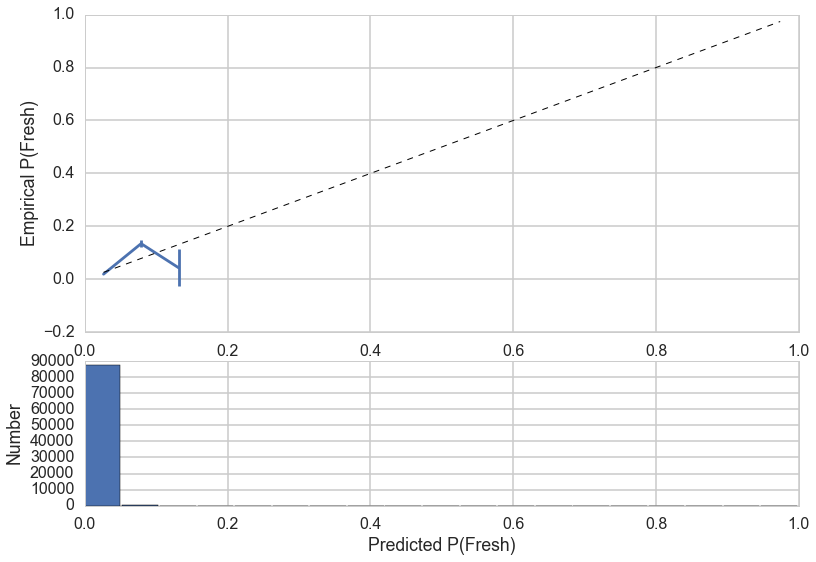

In [138]:
calibration_plot(clf, xtest, ytest)

# Reducint the scope did not have much improvements either

# LDA

In [197]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(politics.shape[0]), train_size=0.7)
mask=np.ones(politics.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [178]:
from sklearn.svm import LinearSVC

In [179]:
lcols=['controversiality', 'created_utc', 'downs', 'gilded', 'comment_length', 'n_tokens', 'time']

In [189]:
clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=politics[lcols].values
Yresp=politics['ups'].values

In [199]:
Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [201]:
from sklearn.grid_search import GridSearchCV
parameters = {"C": Cs}
fitmodel = GridSearchCV(clfsvm, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xmatrix_train, Yresp_train)
best = fitmodel.best_params_["C"]
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

C:\Users\You-Myeong\Anaconda\lib\site-packages\sklearn\cross_validation.py:417: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


(LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
      penalty='l2', random_state=None, tol=0.0001, verbose=0),
 {'C': 0.001},
 0.164260506897658,
 [mean: 0.16426, std: 0.10374, params: {'C': 0.001},
  mean: 0.08245, std: 0.09099, params: {'C': 0.01},
  mean: 0.06352, std: 0.05703, params: {'C': 0.1},
  mean: 0.15014, std: 0.12324, params: {'C': 1.0},
  mean: 0.05711, std: 0.06818, params: {'C': 10.0},
  mean: 0.10822, std: 0.11002, params: {'C': 100.0}])

In [202]:
from sklearn.metrics import accuracy_score
clfsvm.fit(Xmatrix_train, Yresp_train)
ypred2=clfsvm.predict(Xmatrix_test)
accuracy_score(ypred2, Yresp_test)

0.07859281437125748